In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    rmse = mean_squared_error(y, y_pred, squared=False)
    return rmse

In [3]:
def get_xgboost_model():
    model =  XGBRegressor(objective='reg:linear',
                          random_state=seed, 
                          tree_method='gpu_hist', 
                          predictor='gpu_predictor',
                          verbosity=0)
    return model

In [4]:
warnings.filterwarnings("ignore")
seed=47

In [5]:
name = "dados-historicos-partner_i-cement-CPIIF40.csv"
df_r3d_and_r7d = pd.read_csv("../../data/interim/" + "r3d_and_r7d-no-resampling-without-fillna-" + name)
df_r3d_only = pd.read_csv("../../data/interim/" + "r3d_only-no-resampling-without-fillna-" + name)
df_no_r3d_r7d = pd.read_csv("../../data/interim/" + "no-r3d-r7d-no-resampling-without-fillna-" + name)

# XGBoost Gradient

# Repeated KFold Cross validation

<h3>Experiment 1</h3>
<h4> Repeated KFold Cross Validation - df_no_r3d_r7d</h4>

<b>Dataset: df_no_r3d_r7d:</b> In this dataset the R3D and R7D variables are not considered.

In [6]:
y = df_no_r3d_r7d['R28D']
x = df_no_r3d_r7d.drop(['Data/Hora', 'R28D'], axis=1)

In [7]:
model = get_xgboost_model()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 2.023 (0.216)


<h3>Plot of feature importance</h3>

1.6597021264277556


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

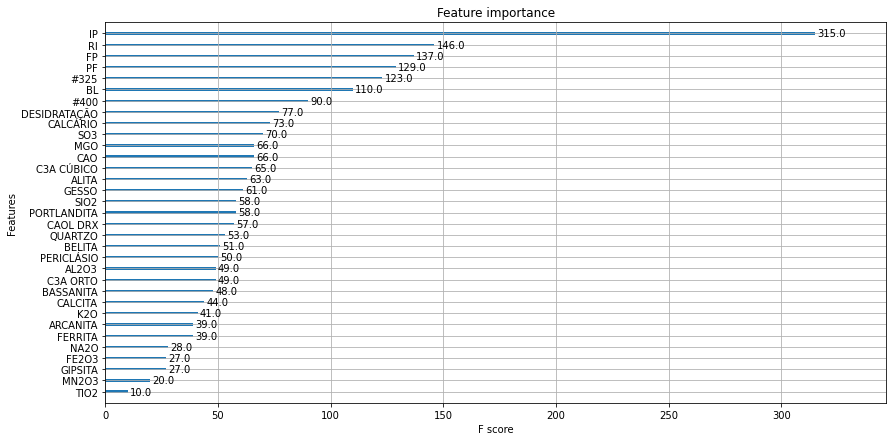

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)       
model = get_xgboost_model()
model.fit(x_train, y_train, verbose=True)
score = evaluate_model(model, x_test, y_test)
print(score)
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model)

<h3>Experiment 2</h3>
<h4> Repeated KFold Cross Validation - df_r3d-only</h4>

<b>Dataset: df_r3d-only:</b> In this dataset the R7D variable is not considered.

In [9]:
y = df_r3d_only['R28D']
x = df_r3d_only.drop(['Data/Hora', 'R28D'], axis=1)

In [10]:
model = get_xgboost_model()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.778 (0.200)


<h3>Plot of feature importance</h3>

1.5564121095108023


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

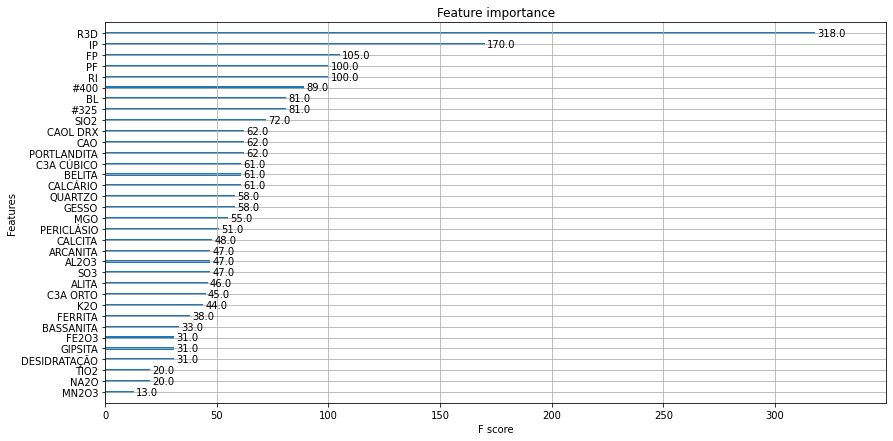

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)       
model = get_xgboost_model()
model.fit(x_train, y_train, verbose=True)
score = evaluate_model(model, x_test, y_test)
print(score)
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model)

<h3>Experiment 3</h3>
<h4> Repeated KFold Cross Validation - df_r3d-and-rd7</h4>

<b>Dataset: df_r3d_and_r7d:</b> In this dataset both R3D and R7D variables are considered.

In [12]:
y = df_r3d_and_r7d['R28D']
x = df_r3d_and_r7d.drop(['Data/Hora', 'R28D'], axis=1)

In [13]:
model = get_xgboost_model()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.585 (0.208)


<h3>Plot of feature importance</h3>

1.5312358020870758


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

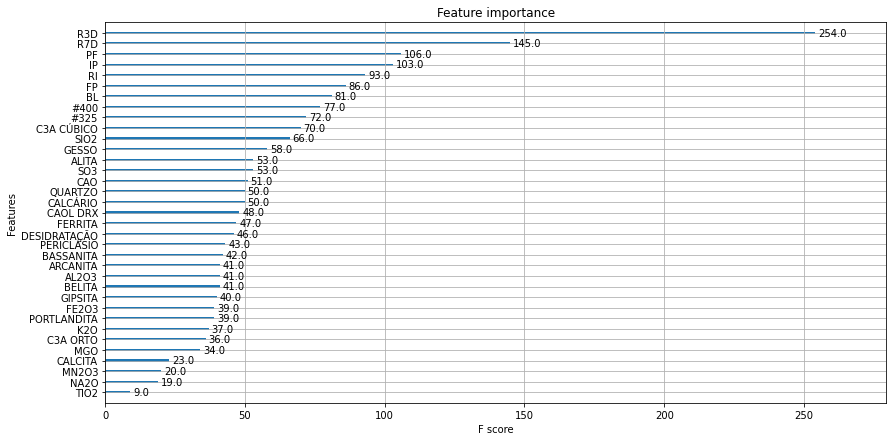

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)       
model = get_xgboost_model()
model.fit(x_train, y_train, verbose=True)
score = evaluate_model(model, x_test, y_test)
print(score)
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model)